# A code-along to get to grips with Keras at a Bath ML meetup on June 3rd, 2018.

## Uses Keras to build a FFNN to predict Iris class.

In [27]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(2018)

In [38]:
iris = np.load("data/iris.npy") # load iris data

np.random.shuffle(iris) # have to shuffle data for training/test split for Keras validation

iris_labels = iris[:,4] # split labels from input data
iris_onehot = to_categorical(iris_labels) # encode as one hot labels

In [43]:
# Create a sequential model object
model = Sequential()

# Add one dense layer with 15 output neurons, sigmoid activation with an input shape of 4 to match Iris dataset.
model.add(Dense(15, activation="sigmoid", input_shape=(4,)))

# Add an output layer with 3 neurons for the type of Iris
model.add(Dense(3, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 15)                75        
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 48        
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compile model
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [45]:
result = model.fit(iris[:,:4], iris_onehot, epochs=50, batch_size=20, validation_split=0.2)

Train on 120 samples, validate on 30 samples
Epoch 1/50
120/120 [==============================] - 1s 6ms/step - loss: 1.0654 - acc: 0.3500 - val_loss: 1.1151 - val_acc: 0.2667
Epoch 2/50
120/120 [==============================] - 0s 283us/step - loss: 1.0350 - acc: 0.3500 - val_loss: 1.0819 - val_acc: 0.2667
Epoch 3/50
120/120 [==============================] - 0s 398us/step - loss: 1.0115 - acc: 0.3500 - val_loss: 1.0560 - val_acc: 0.2667
Epoch 4/50
120/120 [==============================] - 0s 422us/step - loss: 0.9935 - acc: 0.4083 - val_loss: 1.0352 - val_acc: 0.3000
Epoch 5/50
120/120 [==============================] - 0s 583us/step - loss: 0.9776 - acc: 0.5333 - val_loss: 1.0179 - val_acc: 0.4667
Epoch 6/50
120/120 [==============================] - 0s 381us/step - loss: 0.9650 - acc: 0.6500 - val_loss: 1.0034 - val_acc: 0.6000
Epoch 7/50
120/120 [==============================] - 0s 386us/step - loss: 0.9531 - acc: 0.6583 - val_loss: 0.9911 - val_acc: 0.6333
Epoch 8/50
120/120 

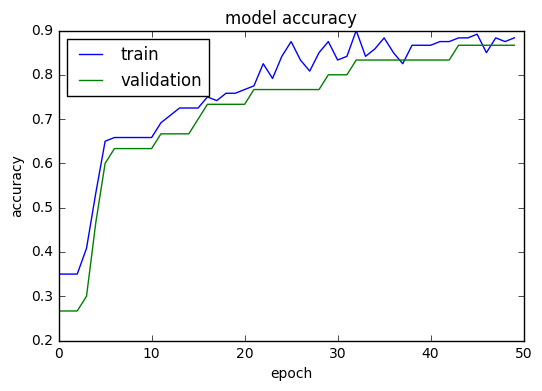

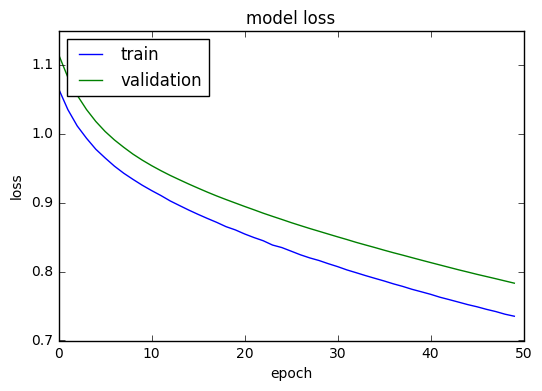

In [46]:
#  "Accuracy"
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
